## Stacks pipeline batch 1 - data exploration & visualization

<br>
This notebook includes: 
1. heterozygosity v. read depth
2. Haplotype Fis distribution
3. Overall Fis, Fit, Fst distribution by locus
4. read depth by tag number, distribution of read depth per tag

<br>
### (1) heterozygosity v. read depth 

This uses a script from Dan Drinan to compare heterozygosity v. read depth in an individual. I ran the script on all individuals that were *retained after the filtering step*, or that had <20% genotypes missing

In [23]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [4]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [6]:
!head hetVsReadDepth.py



################################################################################
#
# hetVsReadDepth.py - this is a script used to compare heterozygosity vs.
# read depth in an individual or list of individuals
#
# 2017-March-28
# Daniel Drinan (ddrinan@uw.edu)
#


In [9]:
!mv hetVsReadDepth.py ../samplesT92/hetVsReadDepth.py

In [25]:
cd ../samplesT92/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92


In [41]:
!python hetVsReadDepth_gzip.py \
-l ../scripts/samples_fqfiles_filtered.txt \
-f ../stacks_wgenome/batch_1.filteredIndivids.filteredMAF_filteredLoci20p.gen \
-o ../analyses/batch1_HetvReadDepth_filtered \
-d 4

KOD03_035 2644952.0 0.26479832373

KOD03_051 1353028.0 0.228912466844

KOD03_052 3604717.0 0.241244119185

KOD03_054 1783756.0 0.309866527087

KOD03_055 3668576.0 0.347464239272

KOD03_056 1196107.0 0.227381905524

KOD03_057 9225135.0 0.444126819127

KOD03_058 1736725.0 0.184086134454

KOD03_059 1153457.0 0.213325183374

KOD03_061 5100042.0 0.345303148582

KOD03_063 2796354.0 0.299554857292

KOD03_064 8943131.0 0.446725571726

KOD03_065 3613026.0 0.375162718042

KOD03_066 5240244.0 0.430353430353

KOD03_067 6279450.0 0.356492323705

KOD03_068 1158489.0 0.205970149254

KOD03_069 2271243.0 0.202402716114

KOD03_070 1027848.0 0.201787258576

KOD03_071 4874649.0 0.216497527973

KOD03_072 893099.0 0.18705242051

KOD03_073 818087.0 0.173140620295

KOD03_074 2681786.0 0.202152796009

KOD03_075 1064316.0 0.171848501979

KOD03_076 2305672.0 0.230104712042

KOD03_077 1722277.0 0.192716640085

KOD03_078 5446567.0 0.242771555092

KOD03_079 1019426.0 0.172878440367

KOD03_080 938589.0 0.19529478458

In [42]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [45]:
myfile = open("batch1_HetvReadDepth_filtered", "r")

count = 0
read_depth = []
prop_het = []

for line in myfile: 
    if count > 1: 
        new_depth = line.strip().split()[1]
        new_het = line.strip().split()[2]
        read_depth.append(new_depth)
        prop_het.append(new_het)
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " samples."


Processed  265  samples.


In [50]:
length = len(read_depth)
for i in range(0,length):
    read_depth[i] = float(read_depth[i])

length = len(prop_het)
for i in range(0,length):
    prop_het[i] = float(prop_het[i])
    

In [56]:
import numpy as np
import matplotlib.pyplot as plt

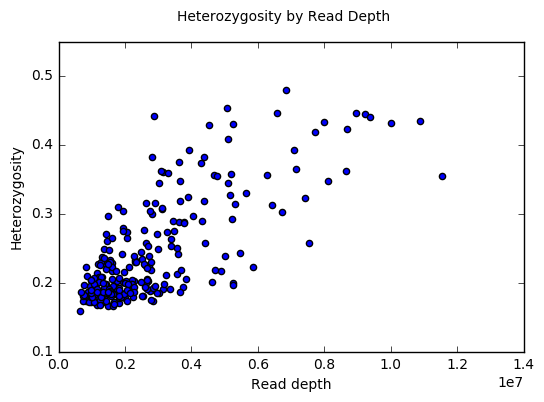

In [57]:
plt.scatter(read_depth, prop_het)
plt.suptitle("Heterozygosity by Read Depth")
plt.xlabel("Read depth")
plt.ylabel("Heterozygosity")
plt.show()

In [58]:
plt.close()

To find the correlation between the two: 

In [59]:
np.corrcoef(read_depth, prop_het)

array([[ 1.        ,  0.75939723],
       [ 0.75939723,  1.        ]])

So the correlation is **0.7594**



<br>
I'm curious to see if this is different from the first runthrough of stacks, which did not use a reference genome. So I went back and did the filtering steps for the `stacks/batch_1.genepop` and then ran the steps above on that file: 


<br>
<br>
<br>
<br>

### (2) Haplotype Fis distribution 

**(1)** I ran this [r script](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/Fis.R) - borrowed from Natalie - to find per population Fis and heterozygosity. 

In [12]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/samplesT92'

In [13]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


<br>
**(2)** Plot in frequency histogram based off of Natalie's [scallop notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/script_demos_notebooks/Plot%20num%20alleles%20per%20locus%20from%20catalog%20file.ipynb).

In [14]:
genepop = open("USpcod_Fis_3-24.txt", "r")
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]
fis_bypop = []
fis_all = []

counter = 1
NA_count = 0
total_count = 0
for line in genepop: 
    if counter == 1: 
            counter += 1
    else: 
        fis_values = line.strip().split()[1:]
        for i in fis_values:
            if i == "NA":
                NA_count += 1
                total_count += 1
            else: 
                fis_all.append(float(i))
                total_count += 1
        counter += 1

total_loci = counter - 2
print "Fis values recorded from ", total_loci, " loci."
print "Removed ", NA_count, " NAs from ", total_count, " Fis values"
        

Fis values recorded from  3848  loci.
Removed  5117  NAs from  30784  Fis values


In [15]:
for i in range(0, len(fis_all)): 
    fis_all[i] = float(fis_all[i])

In [16]:
import numpy as np
import matplotlib.pyplot as plt

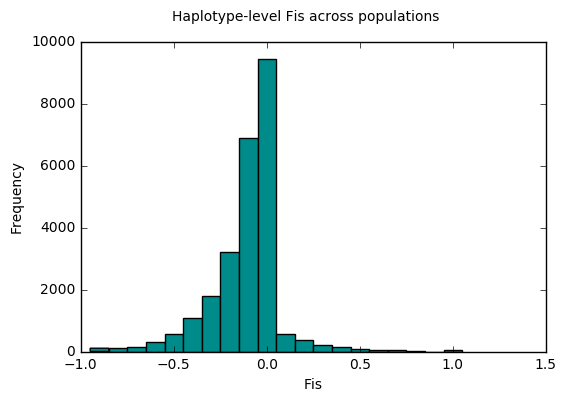

In [61]:
plt.hist(fis_all, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Haplotype-level Fis across populations")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [18]:
fis_file = open("USpcod_Fis_3-24.txt", "r")
lines = fis_file.readlines() # exclude header
headerline = lines[0] # get header line
restlines = lines[1:] # get rest of lines
header_pops = headerline.strip().split("\t")
header_pops = header_pops[1:]
pops = ["Kodiak03", "Adak06", "WashCoast05", "HecStrait04", "PugetSound12", "GeorgiaStrait13", "PWSound12", "UnimakPass03"]

In [19]:
header_pops

['"AD06_048"',
 '"WC05_048"',
 '"HS04_048"',
 '"PS12_009"',
 '"GS13_017"',
 '"PWS12_133"',
 '"UP03_048"']

In [20]:
fis_sets = []
NA_count = 0
total_count = 0

snp_all_fis = []
for pop in header_pops:
    pop_fis = []
    pop_index = header_pops.index(pop) + 1
    for line in restlines:
        linelist = line.strip().split("\t")
        snp_fis = linelist[pop_index]
        if snp_fis == "NA":
            NA_count += 1
            total_count += 1
        elif snp_fis != "NA":
            snp_fis = float(snp_fis)
            pop_fis.append(snp_fis)
            snp_all_fis.append(snp_fis)
            total_count += 1
    fis_sets.append(pop_fis)

print "NA count: " + str(NA_count)
print "NAs made up " + str(float(NA_count)/float(total_count)*100)[0:5] + "% of your Fis estimates."

NA count: 4616
NAs made up 17.13% of your Fis estimates.


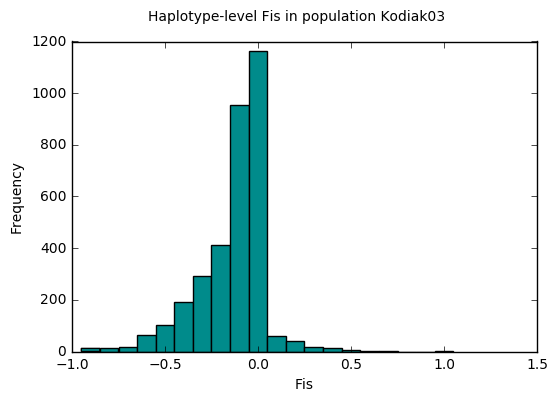

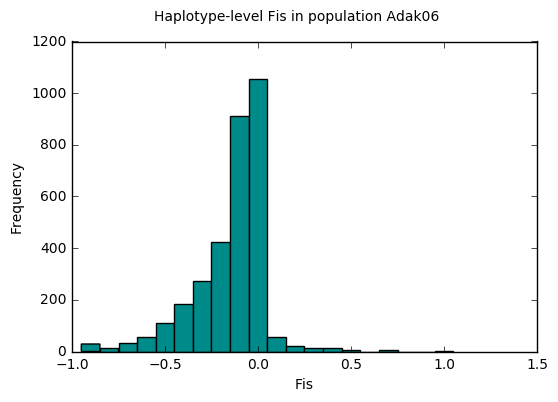

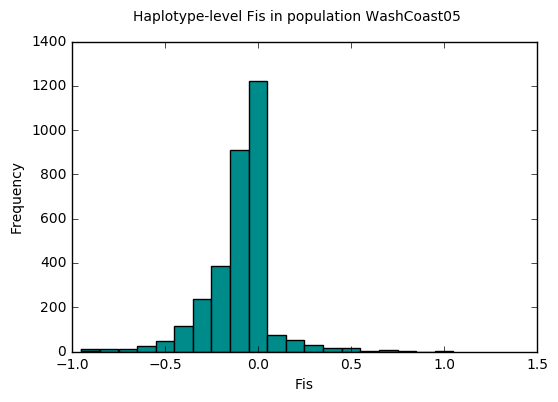

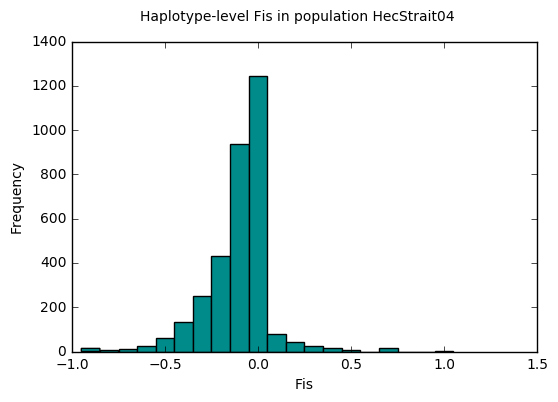

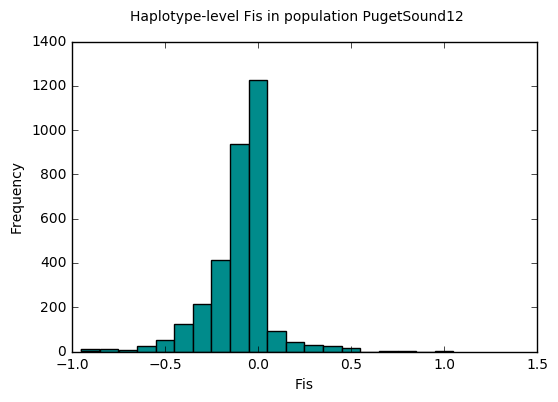

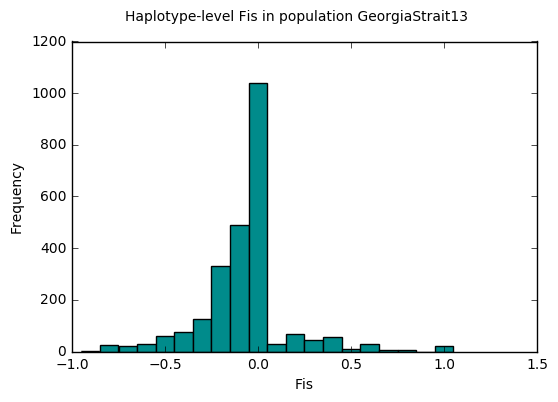

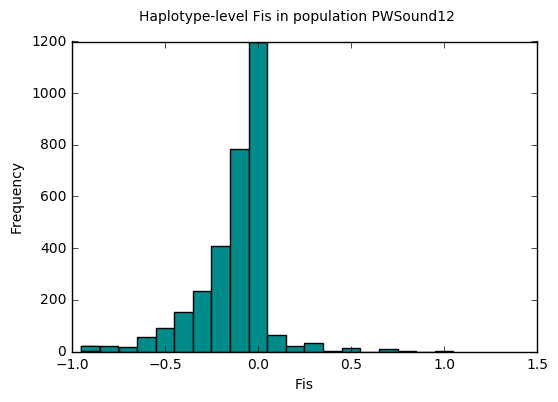

In [60]:
for i in range(0,len(header_pops)):
    plt.hist(fis_sets[i], bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
    plt.suptitle("Haplotype-level Fis in population " + pops[i])
    plt.xlabel("Fis")
    plt.ylabel("Frequency")
    plt.show()

In [22]:
fis_file.close()


<br>
<br>
<br>
<br>

### (3) Fis, Fst, Fit by locus

**(1)** Ran option 6 >> 1 in GENEPOP

![genepop](https://github.com/mfisher5/PCod-US-repo/blob/master/analyses/genepop/batch_1_filteredIndivids_home.png?raw=true)


<br>
**(2)** Used Dan's python script to parse genepop output

In [62]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [63]:
cd genepop/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses/genepop


In [64]:
!head parseGenepopINFandFST.py

################################################################################
#
# parseGenepopINF.py - this is a script used to parse output files created
# by genepop
#
# 2017-March-21
# Daniel Drinan (ddrinan@uw.edu)
#
# population - HWE, He (INF), Ho (INF), Fis_wc (INF), Fis_RH (INF)
################################################################################


In [69]:
!python parseGenepopINFandFST.py \
-f batch_1_filteredIndivids_filteredMAFfilteredLoci20p.txt.FST \
-o batch_1_FSTgenepop_parsed_output.txt


<br>
**(3)** Plot in frequency histogram

In [73]:
myfile = open("batch_1_FSTgenepop_parsed_output.txt", "r")

count = 0
loci = []
fis = []
fst = []
fit = []

for line in myfile: 
    if count > 1: 
        loci.append(line.strip().split()[0])
        fis.append(float(line.strip().split()[1]))
        fst.append(float(line.strip().split()[2]))
        fit.append(float(line.strip().split()[3]))
        count += 1
    else: 
        count += 1

myfile.close()

print "Processed ", count, " loci."

Processed  3849  loci.


In [74]:
import numpy as np
import matplotlib.pyplot as plt

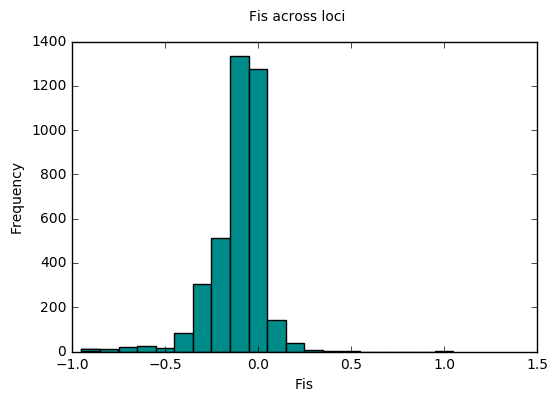

In [85]:
plt.hist(fis, bins = np.arange(-1, 1.1, .1)+0.05, color = "darkcyan")
plt.suptitle("Fis across loci")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

In [86]:
plt.close()

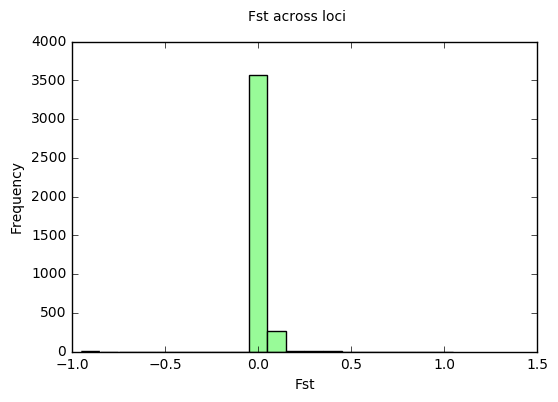

In [87]:
plt.hist(fst, bins = np.arange(-1, 1.1, .1)+0.05, color = "palegreen")
plt.suptitle("Fst across loci")
plt.xlabel("Fst")
plt.ylabel("Frequency")
plt.show()

In [88]:
plt.close()

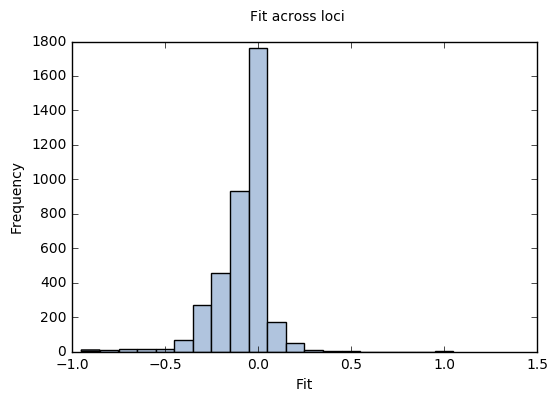

In [89]:
plt.hist(fit, bins = np.arange(-1, 1.1, .1)+0.05, color = "lightsteelblue")
plt.suptitle("Fit across loci")
plt.xlabel("Fit")
plt.ylabel("Frequency")
plt.show()

In [90]:
plt.close()




<br>
<br>
<br>
### (3) average distribution of read depth per tag ID


Part of the following code was borrowed from Natalies [notebook](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/data_processing_notebooks/plot_tagID_v_read_depth.ipynb). 

In [2]:
cd ../stacks_wgenome

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/stacks_wgenome


In [3]:
!printf "%s\n" *.matches.tsv > list_matches_filenames.txt

In [4]:
!head list_matches_filenames.txt

AD06_001.matches.tsv
AD06_002.matches.tsv
AD06_003.matches.tsv
AD06_004.matches.tsv
AD06_005.matches.tsv
AD06_006.matches.tsv
AD06_007.matches.tsv
AD06_008.matches.tsv
AD06_009.matches.tsv
AD06_010.matches.tsv


!!! Manually removed Pribilof Islands!!!

In [8]:
# create a list of .matches.tsv file names to open below
file_of_filenames = open("list_matches_filenames.txt","r")
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)

In [9]:
print filename_list[0:5]

['AD06_001.matches.tsv', 'AD06_002.matches.tsv', 'AD06_003.matches.tsv', 'AD06_004.matches.tsv', 'AD06_005.matches.tsv']


In [23]:
#initiate dictionary
rd_final_dict = {}
reps = 0

for file in filename_list:
    rd_dict = {}
    indfile = open(file,"r")
    lines = indfile.readlines()[1:]   #read all of file except header
    newcount = 0
    #create the individual's dictionary of read depths per locus
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in rd_dict:
            rd_dict[locus] = int(count) 
        elif locus in rd_dict:
            oldcount = rd_dict[locus]
            newcount = oldcount + count
            rd_dict[locus] = newcount
        else:
            print "Something funky is going on."
    #append all individual's counts to the final dictionary by locus
    locus_list = rd_dict.keys()
    for locus in locus_list: 
        reads = rd_dict[locus]
        if locus not in rd_final_dict: 
            rd_final_dict[locus] = [reads]
        else: 
            averages = rd_final_dict[locus]
            averages.append(reads)
            rd_final_dict[locus] = averages
    reps += 1
    print "file ", file, " counted."
    indfile.close()

file  AD06_001.matches.tsv  counted.
file  AD06_002.matches.tsv  counted.
file  AD06_003.matches.tsv  counted.
file  AD06_004.matches.tsv  counted.
file  AD06_005.matches.tsv  counted.
file  AD06_006.matches.tsv  counted.
file  AD06_007.matches.tsv  counted.
file  AD06_008.matches.tsv  counted.
file  AD06_009.matches.tsv  counted.
file  AD06_010.matches.tsv  counted.
file  AD06_011.matches.tsv  counted.
file  AD06_012.matches.tsv  counted.
file  AD06_013.matches.tsv  counted.
file  AD06_014.matches.tsv  counted.
file  AD06_015.matches.tsv  counted.
file  AD06_016.matches.tsv  counted.
file  AD06_017.matches.tsv  counted.
file  AD06_018.matches.tsv  counted.
file  AD06_019.matches.tsv  counted.
file  AD06_020.matches.tsv  counted.
file  AD06_021.matches.tsv  counted.
file  AD06_022.matches.tsv  counted.
file  AD06_023.matches.tsv  counted.
file  AD06_024.matches.tsv  counted.
file  AD06_025.matches.tsv  counted.
file  AD06_026.matches.tsv  counted.
file  AD06_027.matches.tsv  counted.
f

In [26]:
#checking final dictionary counts to make sure they are appending
#and not summing
print rd_final_dict[100]

[121, 48, 60, 43, 54, 93, 21, 22, 72, 29, 10, 12, 96, 81, 29, 30, 32, 39, 15, 39, 20, 83, 78, 36, 13, 49, 89, 23, 21, 15, 44, 88, 25, 84, 31, 42, 59, 75, 98, 28, 14, 98, 108, 17, 69, 12, 16, 62, 108, 48, 18, 14, 72, 60, 56, 20, 82, 56, 110, 22, 136, 27, 82, 68, 236, 220, 230, 118, 13, 85, 20, 136, 19, 28, 54, 46, 34, 97, 16, 26, 111, 71, 36, 42, 12, 43, 11, 171, 30, 19, 14, 59, 36, 24, 67, 45, 77, 28, 59, 15, 20, 67, 40, 258, 29, 15, 15, 130, 15, 60, 276, 75, 146, 168, 10, 62, 15, 121, 12, 17, 47, 18, 47, 38, 192, 13, 17, 107, 95, 40, 105, 83, 22, 85, 38, 14, 45, 18, 69, 32, 23, 82, 15, 46, 91, 24, 252, 23, 20, 106, 21, 66, 206, 133, 289, 83, 23, 93, 23, 173, 21, 59, 76, 12, 69, 24, 88, 22, 24, 79, 26, 36, 72, 49, 52, 13, 167, 50, 17, 44, 21, 51, 42, 25, 294, 32, 243, 144, 67, 316, 59, 291, 40, 80, 343, 70, 52, 98, 37, 42, 191, 135, 45, 57, 74, 44, 87, 30, 119, 21, 87, 49, 36, 27, 37, 69, 39, 96, 281, 43, 97, 60, 21, 21, 17, 77, 49, 16, 100, 49, 32, 15, 37, 13, 23, 24, 149, 215, 23, 12

In [28]:
#take averages at each locus
locus_list = rd_final_dict.keys()
rd_avg_dict = {}
for locus in locus_list: 
    newlist = rd_final_dict[locus]
    average = float(sum(newlist))/float(len(newlist))
    rd_avg_dict[locus] = average
        

In [31]:
#create a list of the read depth averages 
#by extracting values from dictionary
count_list = []
for locus in locus_list:
    avg_reads = rd_avg_dict[locus]
    count_list.append(avg_reads)

In [32]:
#import plotting packages
import matplotlib.pyplot as plt
import numpy as np

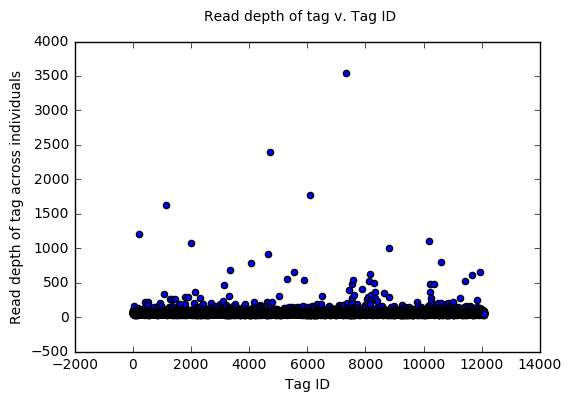

In [33]:
#create scatterplot
plt.scatter(locus_list, count_list)
plt.suptitle("Read depth of tag v. Tag ID")
plt.xlabel("Tag ID")
plt.ylabel("Read depth of tag across individuals")
plt.show()

In [34]:
plt.close()

In [35]:
# subset data to focus on read depths less than 1000
count_less_1000 = [num for num in count_list if num < 1000]

In [36]:
# what number of tags have a read depth of less than 100,000
len(count_less_1000)

12062

In [37]:
# what number of tags have a read depth of greater than 1000
len(count_list) - len(count_less_1000)

7

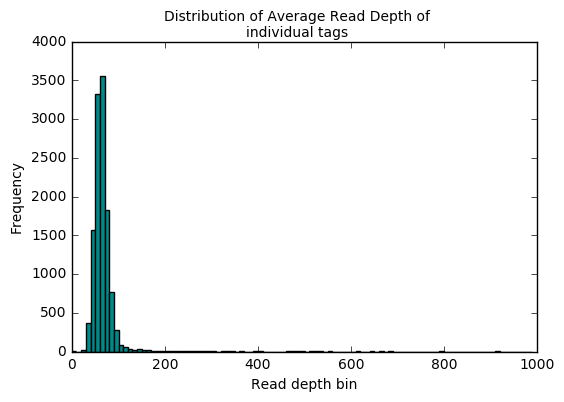

In [39]:
plt.hist(count_less_1000, bins = np.arange(0,1000, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags")
plt.show()

In [87]:
plt.close()

In [40]:
# subset read depths less than 400 (densest range in plot above)
count_less_400 = [num for num in count_list if num < 400]

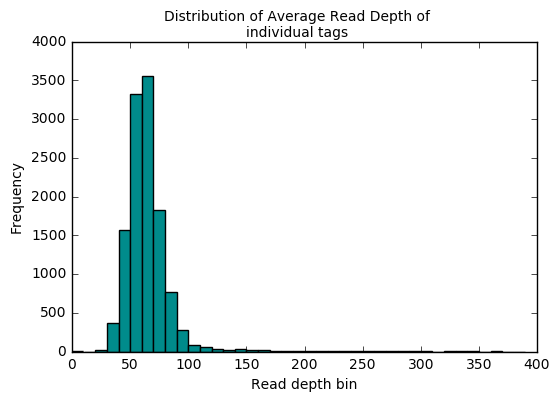

In [41]:
plt.hist(count_less_1000, bins = np.arange(0,400, 10),color = "darkcyan")
plt.xlabel("Read depth bin")
plt.ylabel("Frequency")
plt.suptitle("Distribution of Average Read Depth of\nindividual tags")
plt.show()

In [42]:
plt.close()